#  Quantum-Inspired Traffic Route Optimization (QAOA)

In [2]:
# Imports
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
from tqdm import tqdm
%matplotlib inline

##  Create a Sample Urban Road Graph

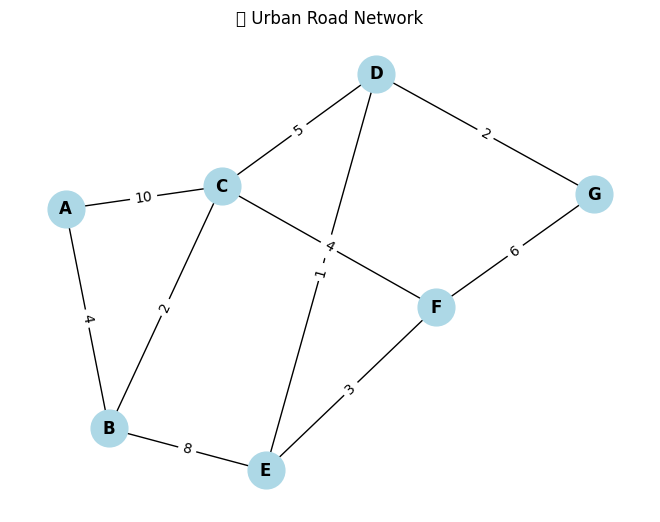

In [11]:
# Define a graph simulating a simple city network
G = nx.Graph()
edges = [
    ('A', 'B', 4), ('B', 'C', 2), ('C', 'D', 5),
    ('D', 'E', 1), ('E', 'F', 3), ('F', 'G', 6),
    ('A', 'C', 10), ('B', 'E', 8), ('C', 'F', 4),
    ('D', 'G', 2)
]


for u, v, w in edges:
    G.add_edge(u, v, weight=w)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700, font_weight='bold')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("🗺️ Urban Road Network")
plt.show()

##  QAOA-Inspired Optimizer Class

In [12]:
class QAOASimulator:
    def __init__(self, graph, p=3):
        self.graph = graph
        self.p = p

    def cost_function(self, path):
        total_cost = 0
        for i in range(len(path) - 1):
            if self.graph.has_edge(path[i], path[i+1]):
                total_cost += self.graph[path[i]][path[i+1]]['weight']
            else:
                total_cost += 1000  # Penalty
        return total_cost

    def mixer(self, path):
        new_path = path[:]
        i, j = random.sample(range(len(path)), 2)
        new_path[i], new_path[j] = new_path[j], new_path[i]
        return new_path

    def optimize(self, start, end, iterations=100):
        try:
            best_path = nx.shortest_path(self.graph, source=start, target=end, weight='weight')
        except nx.NetworkXNoPath:
            return [], float('inf')

        best_cost = self.cost_function(best_path)

        for _ in tqdm(range(iterations)):
            candidate = self.mixer(best_path)
            if candidate[0] != start or candidate[-1] != end:
                continue
            new_cost = self.cost_function(candidate)
            if new_cost < best_cost:
                best_path, best_cost = candidate, new_cost

        return best_path, best_cost

##  Run QAOA Simulation and Compare with Dijkstra

In [13]:
start, end = 'A', 'G'
qaoa = QAOASimulator(G)
q_path, q_cost = qaoa.optimize(start, end)

d_path = nx.dijkstra_path(G, source=start, target=end, weight='weight')
d_cost = sum(G[d_path[i]][d_path[i+1]]['weight'] for i in range(len(d_path)-1))

print(f"QAOA Path: {q_path}, Cost: {q_cost}")
print(f"Dijkstra Path: {d_path}, Cost: {d_cost}")

100%|██████████| 100/100 [00:00<?, ?it/s]

QAOA Path: ['A', 'B', 'C', 'D', 'G'], Cost: 13
Dijkstra Path: ['A', 'B', 'C', 'D', 'G'], Cost: 13


##  Visualization of Paths

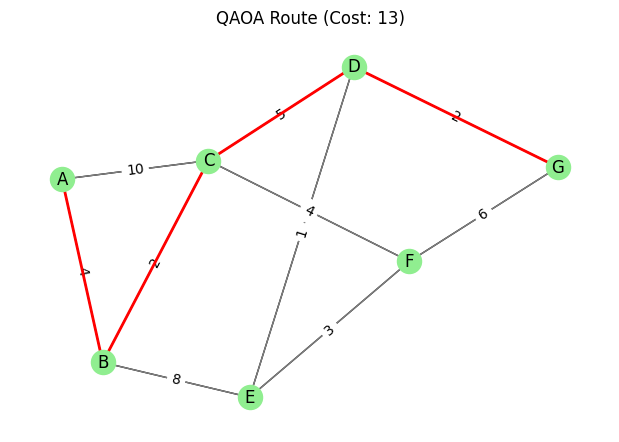

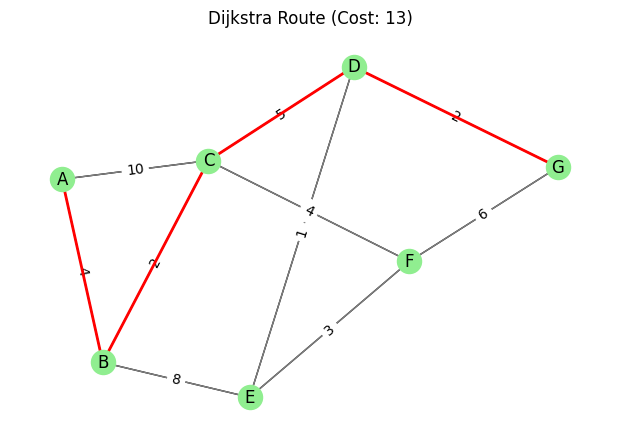

In [14]:
def draw_path(path, title):
    plt.figure(figsize=(6, 4))
    nx.draw(G, pos, with_labels=True, node_color='lightgreen')
    nx.draw_networkx_edges(G, pos, edge_color='gray')
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    edge_path = list(zip(path, path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=edge_path, edge_color='red', width=2)
    plt.title(title)
    plt.show()

draw_path(q_path, f"QAOA Route (Cost: {q_cost})")
draw_path(d_path, f"Dijkstra Route (Cost: {d_cost})")